In [2]:
# !pip install -q --upgrade torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1+cu124 --index-url https://download.pytorch.org/whl/cu124
# !pip install -q --upgrade transformers==4.48.3 datasets==3.2.0 diffusers

## Import the Libraries

In [3]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

## Authorized the Hugging Face Token

In [4]:
hf_token = userdata.get('hugging_face')
login(hf_token, add_to_git_credential=True)

## 01) Sentiment Analysis

In [6]:
sentiment_analysis = pipeline("sentiment-analysis")
sentiment_analysis_result = sentiment_analysis("Today is a nice day to have our dinner out")
print(sentiment_analysis_result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998420476913452}]


In [7]:
sentiment_analysis = pipeline("sentiment-analysis")
sentiment_analysis_result = sentiment_analysis("Such a bad outcome")
print(sentiment_analysis_result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9997968077659607}]


In [8]:
sentiment_analysis = pipeline("sentiment-analysis")
sentiment_analysis_result = sentiment_analysis("Seems like that interview is bit tricky to handle")
print(sentiment_analysis_result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9980192184448242}]


## 02) Named Entity Recognition

In [10]:
named_entity_recognition = pipeline("ner", grouped_entities=True, device="cuda")
named_entity_recognition_result = named_entity_recognition("Barack Obama was the 44th president of the United States.")
print(named_entity_recognition_result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99918306), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9986908), 'word': 'United States', 'start': 43, 'end': 56}]


## 03) Question Answering with Context

In [12]:
question_answerer = pipeline("question-answering", device="cuda")
question_answerer_result = question_answerer(question = "What is the capital city in Sri Lanka",
                                             context = "Sri Jayawardanepura Kotte is the capital city in Sri Lanka")
print(question_answerer_result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.9681623578071594, 'start': 0, 'end': 25, 'answer': 'Sri Jayawardanepura Kotte'}


## 04) Text Summarization

In [14]:
text_summarizer = pipeline("summarization", device="cuda")
text = """Kurunegala is a historic city located in the North Western Province of Sri Lanka, serving as the provincial capital and an important commercial hub in the region.
Surrounded by scenic rock outcrops and lush countryside, the city is well known for its unique landscape, where large rock formations such as Ethagala (Elephant Rock) and Ibbagala (Tortoise Rock) add to its charm and cultural significance.
Kurunegala has deep historical roots, having once been a royal capital during the 13th century, and it still retains traces of its ancient heritage alongside modern development.
Today, it is a bustling center for trade, education, and transportation, connecting the Central and North Western provinces.
With a blend of history, natural beauty, and vibrant urban life, Kurunegala holds an important place in Sri Lanka’s cultural and economic fabric.
"""
summary = text_summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 Kurunegala is a historic city located in the North Western Province of Sri Lanka . It is the provincial capital and an important commercial hub in the region . Surrounded by scenic rock outcrops and lush countryside, the city is


## 05) Translation

In [19]:
translator = pipeline("translation_en_to_fr", device="cuda")
translator_result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(translator_result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [20]:
# Another translation, showing a model being specified
# All translation models are here: https://huggingface.co/models?pipeline_tag=translation&sort=trending

translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
translator_result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(translator_result[0]['translation_text'])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


Los científicos de datos estaban verdaderamente sorprendidos por el poder y la simplicidad de la API de tuberías HuggingFace.


## 06) Classification

In [22]:
classifier = pipeline("zero-shot-classification", device="cuda")
classifier_result = classifier("Kurunegala is a beautiful city in Sri Lanka", candidate_labels=["Geography", "Love", "Politics", "Nature"])
print(classifier_result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'Kurunegala is a beautiful city in Sri Lanka', 'labels': ['Geography', 'Love', 'Nature', 'Politics'], 'scores': [0.3894929587841034, 0.3386717438697815, 0.17719238996505737, 0.09464281052350998]}


## 07) Text Generation

In [26]:
text_generator = pipeline("text-generation", device="cuda")
text_generator_result = text_generator("Sri Lanka is a beautiful island in Inidan Ocean. It's")
print(text_generator_result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sri Lanka is a beautiful island in Inidan Ocean. It's surrounded by a lake that's filled with blueish-blue waters. From there we get to a small ocean resort situated off the coast.

At the end of our climb


## 08) Image Generation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

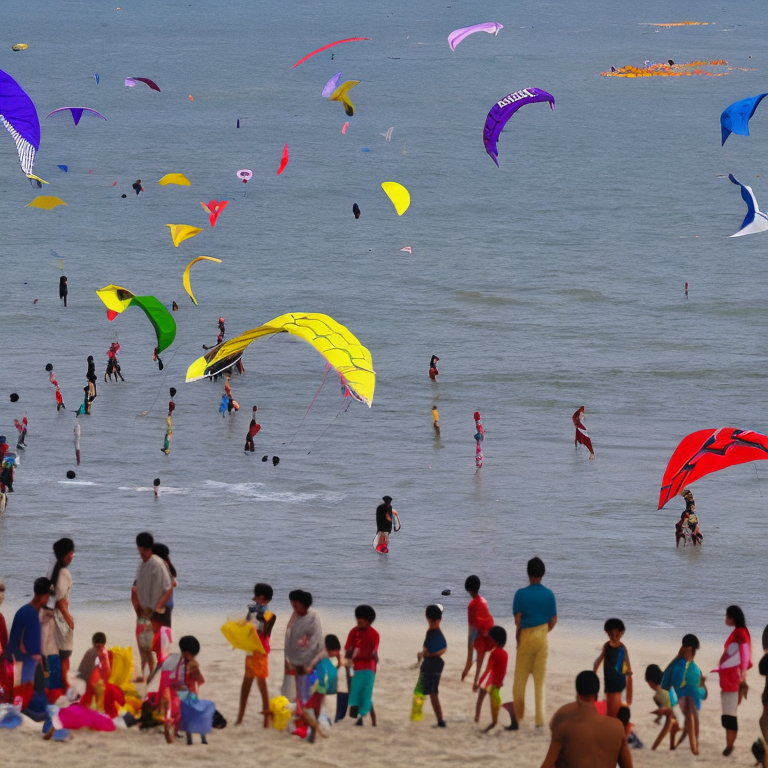

In [28]:
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "A Beach with Kite Festival"
image = image_gen(prompt=text).images[0]
image

## 09) Audio Generation

In [30]:
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Kurunegala is a historic city located in the North Western Province of Sri Lanka . It is the provincial capital and an important commercial hub in the region",
                     forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda


# All the available pipelines

Here are all the pipelines available from Transformers and Diffusers.

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/docs/diffusers/en/api/pipelines/overview
